In [2]:
##import libraries
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.preprocessing  import LabelEncoder
import pickle
import seaborn as sns

In [3]:
car=pd.read_csv(r"C:\Users\narma\OneDrive\Desktop\Project\autos.csv",header=0,sep=',',encoding='Latin1',)


In [4]:
car.sample()

,Unnamed: 0,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,Owner_type,selling_price
4992,6333,Maruti Swift Dzire,Maruti,Swift Dzire,688000.0,1024000.0,3,18000,Dealer,Petrol,Automatic,21.21,1197,81.8,5,1,750000


In [26]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              15411 non-null  object 
 1   model              15411 non-null  object 
 2   vehicle_age        15411 non-null  int64  
 3   km_driven          15411 non-null  int64  
 4   fuel_type          15411 non-null  object 
 5   transmission_type  15411 non-null  object 
 6   mileage            15411 non-null  float64
 7   engine             15411 non-null  int64  
 8   max_power          15411 non-null  float64
 9   seats              15411 non-null  int64  
 10  Owner_type         15411 non-null  int64  
 11  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 1.4+ MB


In [6]:
##remove unwanted columns
car.drop(['Unnamed: 0','car_name','min_cost_price','max_cost_price','seller_type'],axis='columns',inplace=True)
car.sample()

,brand,model,vehicle_age,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,Owner_type,selling_price
12402,Maruti,Swift,12,54000,Petrol,Manual,16.1,1298,88.2,5,1,360000


In [8]:
car1=car.copy()
car1=car1.drop_duplicates(['brand','model','vehicle_age','km_driven','fuel_type','transmission_type','mileage','engine','max_power','seats','Owner_type','selling_price'])

In [9]:
car1.shape

(15331, 12)

<AxesSubplot:xlabel='km_driven', ylabel='Count'>

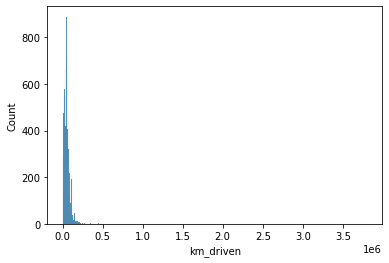

In [10]:
sns.histplot(data=car1,x='km_driven')

In [11]:
#remove outliears
cols= ['km_driven' , 'mileage' , 'engine' , 'max_power','selling_price']

In [12]:
car2 = car1.copy()
from datasist.structdata import detect_outliers 

outliears = detect_outliers(car2[cols],0,car2[cols].columns)
car2.drop(outliears,inplace=True)


In [15]:
car2.shape
car2.sample()

,brand,model,vehicle_age,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,Owner_type,selling_price
5547,Maruti,Vitara,4,29000,Diesel,Manual,24.3,1248,88.5,5,2,985000


In [14]:
##saving cleaned datadet
car2.to_csv("autos_preprocessed.csv")

In [20]:
##convert categorical columns into label encoding
labels=['brand','model','fuel_type','transmission_type']
mapper={}
for i in labels:
    mapper[i]=LabelEncoder()
    mapper[i].fit(car2[i])
    tr=mapper[i].transform(car2[i])
    np.save(str('classes'+i+'.npy'),mapper[i].classes_)
    print(i,":",mapper[i])
    car2.loc[:,i + '_labels']=pd.Series(tr,index=car2.index)
labeled=car2[['selling_price','vehicle_age','km_driven','mileage','engine','max_power','seats','Owner_type']+[x+"_labels" for x in labels]]
print(labeled.columns)
    


brand : LabelEncoder()
model : LabelEncoder()
fuel_type : LabelEncoder()
transmission_type : LabelEncoder()
Index(['selling_price', 'vehicle_age', 'km_driven', 'mileage', 'engine',
       'max_power', 'seats', 'Owner_type', 'brand_labels', 'model_labels',
       'fuel_type_labels', 'transmission_type_labels'],
      dtype='object')


In [21]:
labeled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12186 entries, 0 to 15410
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   selling_price             12186 non-null  int64  
 1   vehicle_age               12186 non-null  int64  
 2   km_driven                 12186 non-null  int64  
 3   mileage                   12186 non-null  float64
 4   engine                    12186 non-null  int64  
 5   max_power                 12186 non-null  float64
 6   seats                     12186 non-null  int64  
 7   Owner_type                12186 non-null  int64  
 8   brand_labels              12186 non-null  int32  
 9   model_labels              12186 non-null  int32  
 10  fuel_type_labels          12186 non-null  int32  
 11  transmission_type_labels  12186 non-null  int32  
dtypes: float64(2), int32(4), int64(6)
memory usage: 1.0 MB


In [22]:
labeled.sample()

,selling_price,vehicle_age,km_driven,mileage,engine,max_power,seats,Owner_type,brand_labels,model_labels,fuel_type_labels,transmission_type_labels
9875,353000,9,48059,19.3,1248,73.9,5,1,9,55,1,1


In [23]:
##split the data set
X=labeled.iloc[:,1:].values
Y=labeled.iloc[:,0].values
Y=Y.reshape(-1,1)

In [82]:
##train the dataset
from sklearn.model_selection import cross_val_score,train_test_split


In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=111)
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)



(9748, 11)
(2438, 11)
(9748, 1)
(2438, 1)


In [94]:
##model building
##random forest
from sklearn.ensemble import RandomForestRegressor

regressor=RandomForestRegressor()
regressor.fit(X_train,np.ravel(Y_train,order='C'))

RandomForestRegressor()

In [98]:
regressor.score(X_train,Y_train)

0.9820810499930617

In [99]:
regressor.score(X_test,Y_test)

0.8839094624158321

In [102]:
#linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [103]:
lr.score(X_train,Y_train)

0.7406358772484445

In [104]:
lr.score(X_test,Y_test)

0.7486364420198988

In [107]:
#xgboost 
from xgboost import XGBRegressor
xgbr=XGBRegressor()
xgbr.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [108]:
xgbr.score(X_train,Y_train)

0.951034958541807

In [115]:
xgbr.score(X_test,Y_test)

0.8955792472380257

In [116]:
#saving the model
import pickle
pickle.dump(xgbr,open("boost.pkl","wb"))